# <div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg", align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.951 · Tipologia i cicle de vida de les dades · Pràtica 2</p>
<p style="margin: 0; text-align:right;">2020-1 · Master universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;"></p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# Pràctia 2: Neteja i anàlisi de les dades

Al llard d'aquesta pràctica aprendrem a identificar les dades rellevants per un projecte analític i a utilitzar les eines d'integració, neteja, validació i anàlisi de les mateixes.

 - **Càrrega del dataset i exploració**: Dades de clients que han demanat un préstec identificant els que són morosos dels que no. 
 - **Integració i selecció de les dades a analitzar**: Escollir les dades.
 - **Neteja de les dades**: Identificació i tractament dels zeros i elements buids, així com dels valors extrems.
 - **Anàlisi de les dades**: selecció de les dades, comprovació de la normalitat i homogeneïtat de la variància. Aplicarem proves estadístiques per comprar els grups de dades.
 - **Representació dels resultats a partir de taules i gràfiques**

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Nom i cognoms:</strong>
</div>

- Joan Oliva Costas
- Ana Cortés Besolí

El projecte requereix les següents llibreries:

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy import stats

# Preprocessat i modelatge KNN

# Configuració warnings
# ------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')

## 1. Càrrega de dades i exploració del dataset 



El dataset escollit és **LoanStats dataset**. Aquest dataset conté dades sobre els préstecs demanats en una empresa de crèdit, [LendingClub](https://www.lendingclub.com/). 

El dataset es pot trobar a un repositori de [BigMl](https://bigml.com/user/bigml/gallery/dataset/4f8b5eae155268783e00000d?reload) de manera oberta.

Les dades representen peticions de préstec que l'empresa ha rebut dels seus clients. En total, conté 48.597 registres i 19 columnes. L'objectiu de les dades és marcar si el préstec és fraudulent o no per tal de poder prendre una decisió sobre la seva concessió.

El dataset també s'adjunta amb el mateix exercici i es pot trobar en el fitxer 'LoanStatsDataset.csv'.

### Descripció de les variables de LoanStats

Les columnes del dataset i la seva interpretació és la següent:

- **Total Amount Funded**: volum del préstec demanat.
- **Loan Length**: duració del préstec expressat en mesos.
- **Monthly PAYMENT**: import de la mensualitat a pagar.
- **Debt-To-Income Ratio:** relació deute-ingressos, és la ràtio d'endeutament respecte als ingressos del client.
- **Home Ownership:** Aquest camp ens indica si el client és propietari de la casa on viu, si la té hipotecada o si viu de lloguer. Té 5 possibles valors:
  - Rent: viu de lloguer
  - Mortgage: paga hipoteca a la casa on viu
  - Own: és propietària de la casa on viu
  - Any: té alguna propietat
  - None: no té cap propietat.
- **Monthly Income:** Ingressos mensuals.
- **Approx.Fico Score:** És un número de tres dígits que dóna informació de si un client té risc o no a l'hora de pagar un préstec.
- **Open CREDIT Lines:** Correspon al nombre de préstecs que té en l'actualitat el client.
- **Total CREDIT Lines:** Correspon al nombre total de préstecs que ha tingut el client.
- **Revolving CREDIT Balance:** És el saldo de crèdit del client.
- **Revolving Line Utilization:** És el percentatge del saldo de crèdit utilitzat pel client.
- **Inquiries in the Last 6 Months:** Nombre de sol·licituds que s'han demanat del client per avaluar el risc per aprovar una sol·licitud, o bé perquè el client ha demanat un altre préstec, hipoteca o augment de línia de crèdit per a les targetes. Com més consultes fetes, vol dir que més vegades ha estat avaluat el risc del client suposadament perquè més crèdit ha demanat.
- **Accounts Now Delinquent:** Variable que conté els valors 0 o 1 per determinar si el client té comptes morosos en l'actualitat. 0 (no morós) i 1 (morós).
- **Delinquencies (Last 2 yrs):** Nombre de vegades que el client ha estat morós en els últims dos anys.
- **Months Since Last Delinquency:** mesos des de l'última morositat del client.
- **Public Records On File:** són registres que apareixen a l'informe de crèdit a causa de problemes de pagament, sentències o gravàmens fiscals. Si un client té aquests tipus de registres, s'informa que el client presenta morositat greu.
- **Months Since Last Record:** variable que informa del nombre de mesos des de l'últim registre públic.
- **Employment Length:** Nombre d'anys que el client porta treballant.
- **Status:** Variable que determina si el préstec pot resultar fraudulent o no.

### Resum de les dades
En aquesta secció es resumeix de manera breu les dades i els seus principals estadístics. 

In [2]:
# Carreguem les dades en un dataset de pandas i visualitzem alguns estadístics importants
df = pd.read_csv('LoanStatsDataset.csv', sep=',')
print("5 primeres files del dataset:")
df.head()

5 primeres files del dataset:


,Total Amount Funded,Loan Length,Monthly PAYMENT,Debt-To-Income Ratio,Home Ownership,Monthly Income,Approx. Fico Score,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Employment Length,Status
0,500,36 months,15.67,0.00,RENT,275.00,732.0,3.0,3.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0,NaN,1.0,Not Delinquent
1,500,36 months,15.69,4.27,RENT,1500.00,732.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Not Delinquent
2,500,36 months,15.75,14.02,ANY,8333.33,732.0,4.0,6.0,56.0,5.6,1.0,0.0,0.0,NaN,0.0,NaN,1.0,Not Delinquent
3,500,36 months,15.76,2.15,RENT,2750.00,732.0,6.0,6.0,3461.0,18.6,10.0,0.0,0.0,0.0,0.0,0.0,2.0,Not Delinquent
4,500,36 months,15.91,0.00,RENT,166.67,695.0,2.0,2.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,Delinquent


In [3]:
#Mostrem la informació del dataset
print("Informació del dataset:")
print(df.info())

Informació del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48599 entries, 0 to 48598
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total Amount Funded             48599 non-null  int64  
 1   Loan Length                     48599 non-null  object 
 2   Monthly PAYMENT                 48599 non-null  float64
 3   Debt-To-Income Ratio            48599 non-null  float64
 4   Home Ownership                  48599 non-null  object 
 5   Monthly Income                  48599 non-null  float64
 6   Approx. Fico Score              48582 non-null  float64
 7   Open CREDIT Lines               48570 non-null  float64
 8   Total CREDIT Lines              48570 non-null  float64
 9   Revolving CREDIT Balance        48570 non-null  float64
 10  Revolving Line Utilization      48498 non-null  float64
 11  Inquiries in the Last 6 Months  48570 non-null  float64
 12  Accounts

Com es pot observar la lectura del dataset interpreta correctament el tipus de totes les variables, pel que no és necessari aplicar transformacions de tipatge.

### Objectiu
L'objectiu d'aquest projecte d'anàlisi de dades és el següent:

* Determinar en funció de les característiques d'un crèdit si aquest **serà fraudulent** o no.

L'empresa que proporciona els prèstecs pot utilitzar aquesta informació per a decidir si acceptar o no un préstec a una determinada petició. Per tant, és important ja que aporta un gran valor de negoci al categoritzar si el préstec serà tornat o no.

Aquest objectiu es pot resoldre a través de l'anàlisi de les variables que formen el dataset, per tal de construir un model estadístic bàsic que respongui si un préstec pot resultar fraudulent o no.

Per respondre a la pregunta, aquesta serà descomposta en diverses preguntes que la reforcin i que es puguin respondre a través d'eines d'estadística bàsica (contrast d'hipòtesis, correlacions, regressions...).

En els següents apartats s'aplicarà un procés d'anàlisi previ per tal d'observar com aquestes influeixen a la pregunta objectiva, així com aplicar les transformacions necessàries per a aconseguir que l'anàlisi sigui estadísticament correcte.

## 2. Integració i selecció de les dades a analitzar



No es contempla cap integració o fusió de dades, ja que el dataset és contingut en una sola font de dades.

### Anàlisi d'integritat
En primer lloc, es realitza una anàlisi d'integritat, per tal de determinar si les variables contenen errors en el format de les seves dades.

Es vol comprovar que les variables de tipus ordinal (aquelles que són numèriques, però representen una relació d'ordre), siguin efectivament nombres sencers completament. És a dir, que no apareguin nombres decimals.

En primer lloc, es comprova que la columna del pagament mensual sí que conté decimals, ja que es tracta d'un import:

In [4]:
# Funció que determina si una columna té valors decimals o no
def columnHasDecimals(series):
    return series.where(lambda x: x%1 != 0).any()

df[['Monthly PAYMENT']].apply(lambda x: columnHasDecimals(x))

Monthly PAYMENT    True
dtype: bool

Un cop s'ha fet la comprovació, es determina si alguna de les columnes que són del tipus float, però que haurien de ser ordinals presenten decimals.

In [5]:
# Comprovació de les columnes que són float però que haurien de contenir sols nombres sencers
columnsToCheck = ['Open CREDIT Lines',\
                  'Approx. Fico Score','Total CREDIT Lines','Inquiries in the Last 6 Months',\
                  'Accounts Now Delinquent','Months Since Last Delinquency','Delinquencies (Last 2 yrs)',\
                  'Months Since Last Delinquency','Public Records On File','Months Since Last Record','Employment Length']
df[columnsToCheck].apply(lambda x: columnHasDecimals(x))

Open CREDIT Lines                 False
Approx. Fico Score                False
Total CREDIT Lines                False
Inquiries in the Last 6 Months    False
Accounts Now Delinquent           False
Months Since Last Delinquency     False
Delinquencies (Last 2 yrs)        False
Months Since Last Delinquency     False
Public Records On File            False
Months Since Last Record          False
Employment Length                 False
dtype: bool

Cap columna presenta aquest problema. Per tant, les dades són sintàcticament correctes.

### Anàlisi estadístic bàsic
En aquesta secció s'analitza la distribució de les dades així com la seva relació amb la variable objectiva. A partir d'aquesta anàlisi es pretén conèixer quines variables són les més importants i quines es poden descartar.

En primer lloc es mostra una taula resum dels estadístics bàsics de les variables que servirà per a enfocar les anàlisis posteriors.

In [6]:
# Taula resum d'estadístics
df.describe()

,Total Amount Funded,Monthly PAYMENT,Debt-To-Income Ratio,Monthly Income,Approx. Fico Score,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,Revolving Line Utilization,Inquiries in the Last 6 Months,Accounts Now Delinquent,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Employment Length
count,48599.000000,48599.000000,48599.000000,48599.000000,48582.000000,48570.000000,48570.000000,4.857000e+04,48498.000000,48570.000000,48570.000000,48570.000000,17443.000000,48570.000000,3826.000000,47267.000000
mean,11178.381757,334.852678,13.396254,5806.618670,715.748137,9.379741,22.121021,1.435322e+04,50.108505,1.051822,0.000082,0.147601,35.414321,0.054602,60.824621,4.982927
std,7355.086203,216.699645,6.661092,5544.183662,35.984118,4.445182,11.459323,2.113321e+04,28.156790,1.474013,0.009075,0.503296,22.330053,0.238262,46.871353,3.568941
min,500.000000,15.670000,0.000000,-0.080000,650.000000,1.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,170.690000,8.320000,3375.000000,695.000000,6.000000,14.000000,3.949250e+03,27.100000,0.000000,0.000000,0.000000,17.000000,0.000000,0.000000,2.000000
50%,10000.000000,291.140000,13.490000,4916.670000,695.000000,9.000000,20.000000,9.253000e+03,51.300000,1.000000,0.000000,0.000000,33.000000,0.000000,86.000000,4.000000
75%,15000.000000,449.320000,18.630000,6916.335000,732.000000,12.000000,29.000000,1.753575e+04,73.500000,2.000000,0.000000,0.000000,52.000000,0.000000,102.000000,9.000000
max,35000.000000,1337.760000,29.990000,500000.000000,790.000000,47.000000,90.000000,1.207359e+06,119.000000,33.000000,1.000000,13.000000,120.000000,5.000000,129.000000,10.000000


Un fet que es pot remarcar de seguida és que la variable **Accounts Now Delinquent** és categòrica, ja que només conté els valors 0 i 1, encara que ha sigut codificada com a float.

#### Variables categòriques
En segon lloc, s'analitzen les variables categòriques. Interessa conèixer la distribució de les diferents categories i la relació de la variable amb la morositat del préstec. S'observen les freqüències de cada classe:

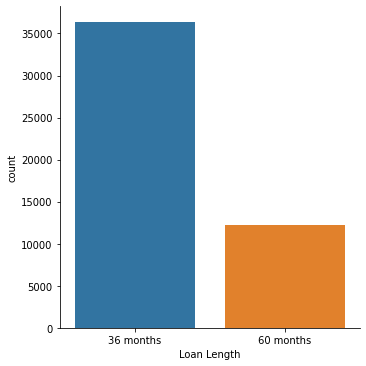

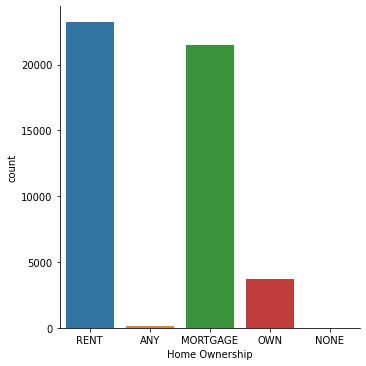

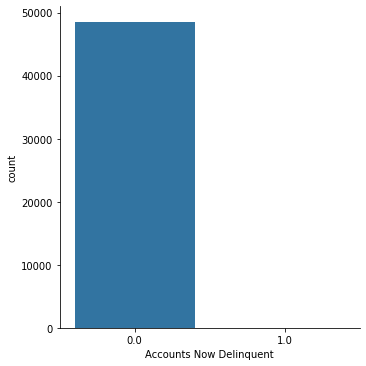

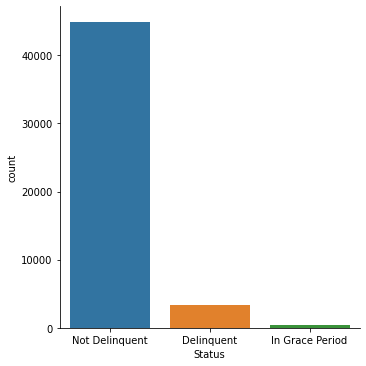

In [7]:
sns.catplot(x='Loan Length', data=df, kind='count');
sns.catplot(x='Home Ownership', data=df, kind='count');
sns.catplot(x='Accounts Now Delinquent', data=df, kind='count');
sns.catplot(x='Status', data=df, kind='count');

Es pot observar que:

1. Els mesos del préstec no presenten cap característica significativa.
2. Els valors ANY i NONE per a la propietat tenen una freqüència molt baixa respecte als altres valors.
3. Pràcticament cap fila de dades presenta la propietat d'accounts now delinquent.
4. Existeix un valor de l'etiqueta del préstec que és període de gràcia, molt poc representatiu.

La categoria de **període de gràcia** és molt poc representativa en el dataset i significa que la decisió sobre si el préstec és o no morós es delega per més endavant.

Per tant, aquesta categoria no aporta informació, ja que pot ser d'un grup o d'un altre. Donada la seva baixa representació, es decideix eliminar totes les files del dataset que tinguin com a etiqueta de préstec aquesta categoria.

In [8]:
df_nograce = df[df.Status != 'In Grace Period']
# Veure les noves categories
df_nograce.Status.unique()

array(['Not Delinquent', 'Delinquent'], dtype=object)

A continuació es visualitzen les possibles correlacions entre les altres variables categòriques i la variable del crèdit. Per fer-ho, s'utilitza un gràfic de barres apilades per percentatge. Aquest gràfic mostra la proporció de les categories de la morositat del crèdit per cada classe de la variable d'interès.

Si existeix una correlació, les proporcions seran diferents.

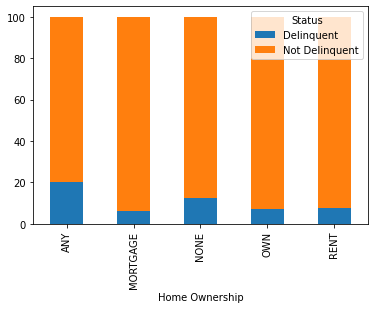

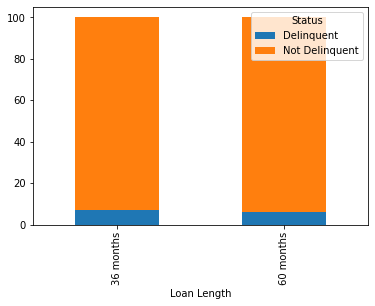

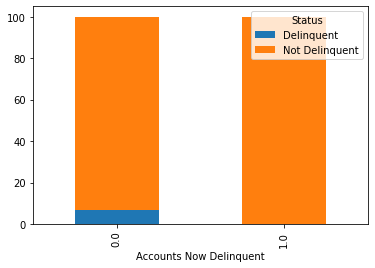

In [9]:
# Gràfic de barres apilades utilitzant la taula de contingència
def stackedBarPlot(df, column1, column2):
    cross = pd.crosstab(df[column1], df[column2], margins = False)
    applied = cross.apply(lambda x: x*100/sum(x), axis=1)
    applied.plot(kind="bar", stacked=True)
    
stackedBarPlot(df_nograce, 'Home Ownership', 'Status')
stackedBarPlot(df_nograce, 'Loan Length', 'Status')
stackedBarPlot(df_nograce, 'Accounts Now Delinquent', 'Status')

S'observa que:

1. Existeixen variacions de la proporció a l'hora de determinar l'etiqueta del préstec en funció de la propietat del client. Les variacions poden arribar al 10%. Sembla que no tenir propietats o la categoria ANY. Cal mencionar que aquestes dues categories disposen de molt pocs individus, pel que aquestes diferències poden no ser significatives.
2. La longitud del préstec no presenta diferències tan significatives com la variable anterior. Així i tot s'han de tenir present que una diferència petita en un dataset tan gran pot prendre importància.
3. No sembla que l'última variable tingui gens d'importància encara que es presenti una diferència de proporció, ja que la classe 1 a penes presenta files en el dataset.

Per assegurar la jugada, es pot realitzar el test chi-squared d'independència de variables. Si el valor-p és inferior a 0.05 es refusa la hipòtesi nul·la i s'accepta que les variables presenten dependència.

In [10]:
# Chi-squared tests
def find_p_value(df, column, target_column):
    crosstab = pd.crosstab(df[column], df[target_column])
    stat, p, dof, expected = chi2_contingency(crosstab) 
    return {'stat':stat,'p-value':p,'column':column}

print(find_p_value(df_nograce, 'Home Ownership', 'Status'))
print(find_p_value(df_nograce, 'Loan Length', 'Status'))
print(find_p_value(df_nograce, 'Accounts Now Delinquent', 'Status'))

{'stat': 71.751267195805, 'p-value': 9.6861186528273e-15, 'column': 'Home Ownership'}
{'stat': 14.898824188140873, 'p-value': 0.0001134336654434595, 'column': 'Loan Length'}
{'stat': 0.20254490541178188, 'p-value': 0.6526744660590855, 'column': 'Accounts Now Delinquent'}


Efectivament, la variable amb més influència és la propietat del client. També ho és la longitud del préstec però no en tanta mesura.

La tercera variable no rebutja la hipòtesi nul·la i per tant es pot eliminar del dataset, ja que no és rellevant per al problema.

In [11]:
df_selectedCategorical = df_nograce.drop('Accounts Now Delinquent', axis=1)

#### Variables numèriques
A continuació, es realitza el procés d'anàlisi i selecció de les variables numèriques.

Aquest procés ha d'enfocar a trobar quines variables numèriques presenten una relació amb l'etiqueta del préstec.

En primer lloc, però, interessa conèixer quines variables numèriques són dependents entre elles. Es pot analitzar de forma visual aquesta dependència a través d'un **pair plot**. Aquesta tasca es realitza per grups per simplificar l'anàlisi.

Addicionalment, s'aprofita per projectar l'etiqueta del préstec d'un color o un altre per tal d'observar si existeix alguna relació evident en els gràfics.

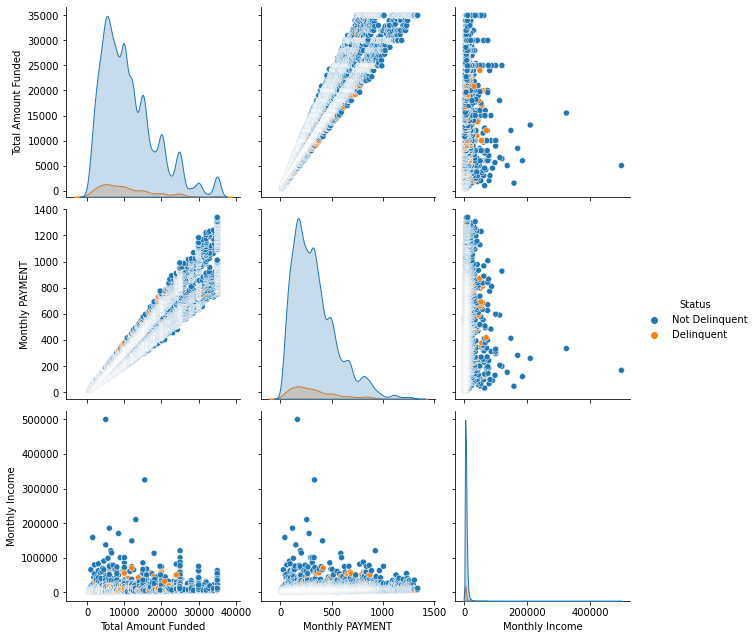

In [12]:
payments = ['Total Amount Funded','Monthly PAYMENT','Monthly Income','Status']
df_payments = df_selectedCategorical[payments]
sns.pairplot(df_payments, hue="Status", size=3);

S'observa que:

1. No existeix cap relació entre la quantitat demanada i els ingressos de la persona ja que el núvol de punts no té cap forma.
2. Existeix una clara relació lineal entre la quantitat demanada i el pagament mensual. És esperable ja que es deu calcular de forma automàtica.
3. No és evident cap relació entre la categoria del crédit i les variables estudiades, almenys de forma visual és difícil d'interpretar.

Per tal d'afinar més, es poden projectar els gràfics de caixa segons el tipus de préstec. Per a facilitar la visualització de les dades, s'ignoren els valors atípics.

Els diagrames de caixa projecten les distribucions de les variables en funció de cada grup. Si existeix una relació entre la variable numèrica i la categòrica, les distribucions poden canviar significativament de forma (mediana desplaçada, quantils diferents...). 

Per contrapartida, si els diagrames de caixa són similars, la distribució és similar i per tant no es pot afirmar que existeixi relació.

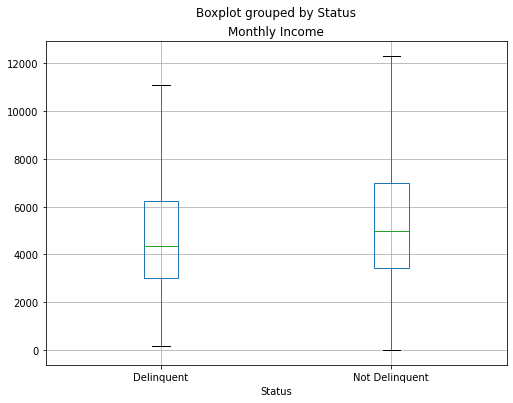

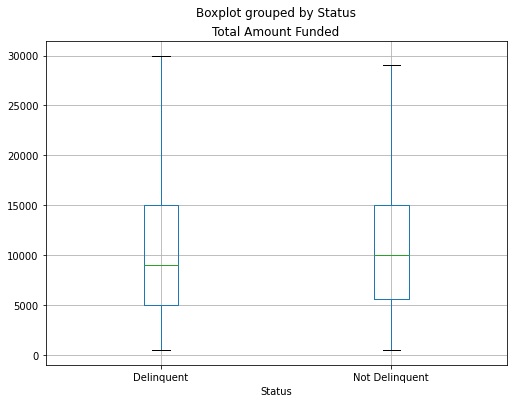

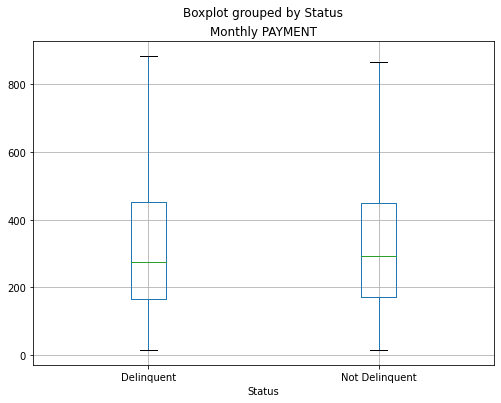

In [13]:
# Mostrar els diagrames de caixa dels ingressos mensuals i del pagament mensual
df_selectedCategorical.boxplot('Monthly Income','Status',showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Total Amount Funded','Status',showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Monthly PAYMENT','Status',showfliers=False, figsize=(8,6))
plt.show()

Així com la diferència entre els quantils Q1 i Q3 és evident en les etiquetes del préstec per als ingressos mensuals, no és tan clar en el pagament mensual.

No sembla que el total del prèstec sigui diferent entre les dues categories.

Es conclou que els ingressos mensuals determinen en major importància si el préstec és o no fraudulent que no pas el pagament mensual. (que és dependent amb la quantitat del crèdit demanat). La quantitat demanda pel prèstec no influeix directament en si el préstec resulta fraudulent o no, però sí que determina el pagament mensual dins d'una forquilla de valors.

S'analitzen ara les altres variables numèriques.

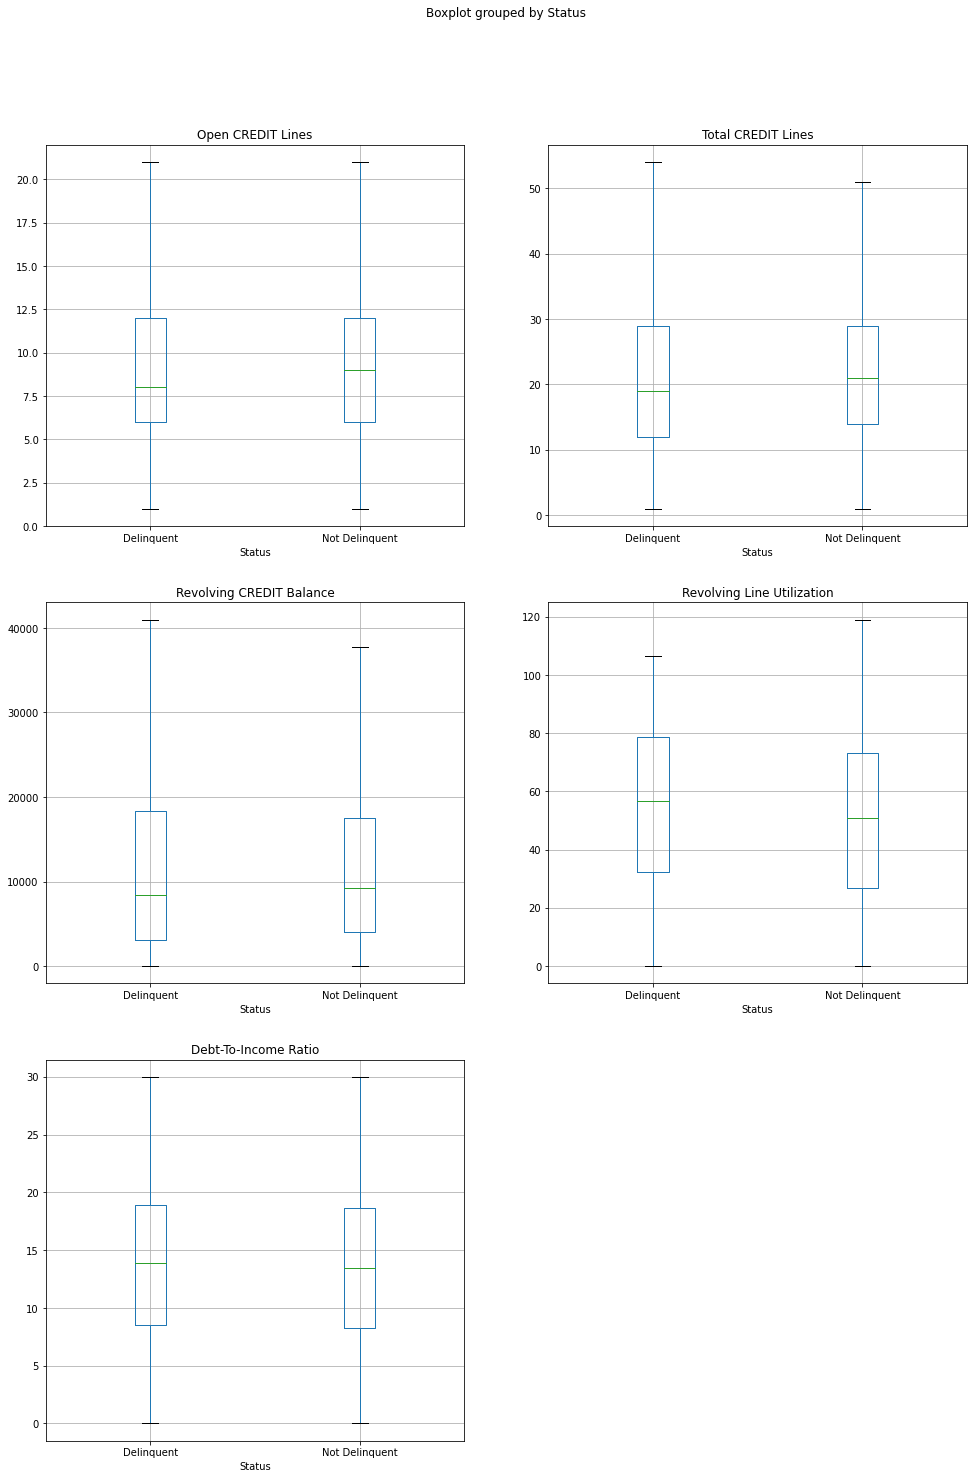

In [14]:
# Mostrar els diagrames de caixa dels ingressos mensuals i del pagament mensual
fig, axes = plt.subplots(3,2, figsize=(16,24))
df_selectedCategorical.boxplot('Open CREDIT Lines','Status',ax=axes[0][0],showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Total CREDIT Lines','Status',ax=axes[0][1],showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Revolving CREDIT Balance','Status',ax=axes[1][0],showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Revolving Line Utilization','Status',ax=axes[1][1],showfliers=False, figsize=(8,6))
df_selectedCategorical.boxplot('Debt-To-Income Ratio','Status',ax=axes[2][0],showfliers=False, figsize=(8,6))
axes[2][1].set_axis_off()
plt.show()

Aquestes gràfiques denoten que:

1. La mediana de OPEN Credit lines és més baixa en el cas que el préstec s'etiqueti com a fraudulent. És a dir, és possible que els clients que cometen frau obrin menys línies de crédit. La diferència entre les dues distribucions només existeix en la mediana, però, ja que les caixes són essencialment iguals en els altres quantils.
2. Aquesta diferència també es pot observar a TOTAL Credit lines, que segurament es pugui expressar com a funció de les línies de crèdit obertes.
3. El balanç de les línies del crèdit rotatiu presenta una petita diferència en la distribució segons els grups.
4. L'ús del crèdit rotatiu pel client sí que és bastant significatiu segons els grups, ja que les caixes apareixen desplaçades.
5. La ràtio deute-ingressos no és diferent segons els grups.

#### Variables Months Since Last Delinquency | Last Record
Aquestes dues variables requereixen un tractament especial. Ambdues contenen una gran quantitat de valors perduts que s'han d'interpretar abans d'analitzar la seva relació amb la variable d'interès.

In [15]:
# Months Since Last Delinquency
df_selectedCategorical['Months Since Last Delinquency'].isnull().value_counts()

True     30922
False    17294
Name: Months Since Last Delinquency, dtype: int64

In [16]:
# Months Since Last Record
df_selectedCategorical['Months Since Last Record'].isnull().value_counts()

True     44408
False     3808
Name: Months Since Last Record, dtype: int64

Es sospita que els valors perduts d'aquestes variables no són perduts de forma accidental, sinó que es tracten de valors que signifiquen **que no s'ha comés mai l'acció indicada**. És a dir, si el client no ha comés mai cap acte fraudulent i no té cap registre, aquests valors seràn **NA**.

Aquesta teoria es pot comprovar a través de la visualització entre la variable "Delinquencies (Last 2 yrs)" i la de mesos des de l'últim impagament. Per l'altra banda, també es pot comprovar la variable de mesos des de l'últim registre amb "Public Records On File".

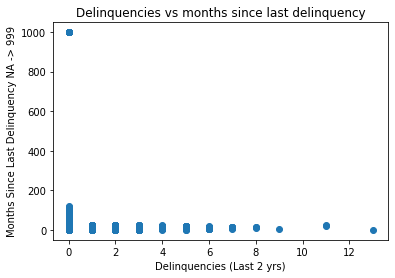

In [17]:
# Crear una nova variable que sigui els mesos des de l'últim impagament sense els NA, s'imputen els valors 999 per dierenciar-los de la resta
df_selectedCategorical['Months Since Last Delinquency NoNA'] = df_selectedCategorical['Months Since Last Delinquency'].fillna(999)
plt.scatter(df_selectedCategorical['Delinquencies (Last 2 yrs)'], df_selectedCategorical['Months Since Last Delinquency NoNA'])
plt.title("Delinquencies vs months since last delinquency")
plt.xlabel("Delinquencies (Last 2 yrs)")
plt.ylabel("Months Since Last Delinquency NA -> 999")
plt.show()

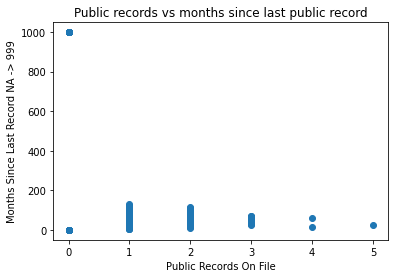

In [18]:
# Crear una nova variable que sigui els mesos des de l'últim impagament sense els NA, s'imputen els valors 999 per dierenciar-los de la resta
df_selectedCategorical['Months Since Last Record NoNA'] = df_selectedCategorical['Months Since Last Record'].fillna(999)
plt.scatter(df_selectedCategorical['Public Records On File'], df_selectedCategorical['Months Since Last Record NoNA'])
plt.title("Public records vs months since last public record")
plt.xlabel("Public Records On File")
plt.ylabel("Months Since Last Record NA -> 999")
plt.show()

In [19]:
# També es pot comprovar mirant els valors únics que tenen les files filtrades pels valors NA
df_selectedCategorical[df_selectedCategorical['Months Since Last Delinquency NoNA'] == 999]['Delinquencies (Last 2 yrs)'].value_counts()

0.0    30893
Name: Delinquencies (Last 2 yrs), dtype: int64

In [20]:
df_selectedCategorical[df_selectedCategorical['Months Since Last Record NoNA'] == 999]['Public Records On File'].value_counts()

0.0    44379
Name: Public Records On File, dtype: int64

En definitiva, totes les variables "Months since..." són NULL quan representa que el client no ha comés l'acció explicativa.

Per tal de poder utilitzar la columna en posteriors anàlisis, s'ha de determinar una estratègia d'imputació. Existeixen les següents variants:

1. Imputar els valors perduts amb un nombre suficientment gran. No és adequat, ja que el nombre pot causar bias.
2. Categoritzar les variables en noves que mantinguin la quantitat més gran d'informació possible i incorporin els valors perduts com a una nova categoria.

S'escull la segona opció. Aquesta serà tractada amb més profunditat a l'etapa d'**imputació de valors perduts**. De moment, s'imputen els valors de forma intuitiva a partir de la distribució de les variables:

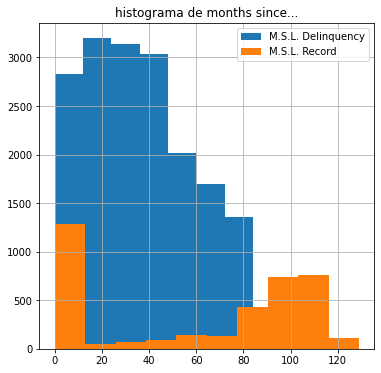

In [21]:
fig = plt.figure(figsize=(6,6))
df_selectedCategorical['Months Since Last Delinquency'].hist(label="M.S.L. Delinquency")
df_selectedCategorical['Months Since Last Record'].hist(label="M.S.L. Record")
plt.legend()
plt.title("histograma de months since...")
plt.show()

El criteri de les categories és el següent:

1. JUST NOW: 0 mesos.
2. LAST YEAR: 1 a 12 mesos.
3. LAST FIVE: 1 a 5 anys.
4. LAST TEN: 5 a 10 anys.
5. NEVER: No presenta incidència.

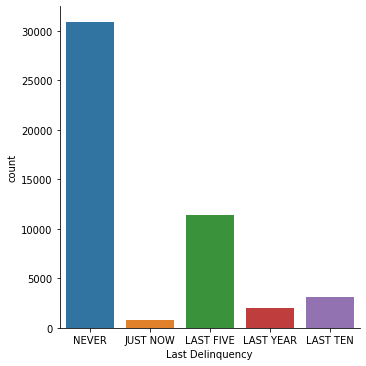

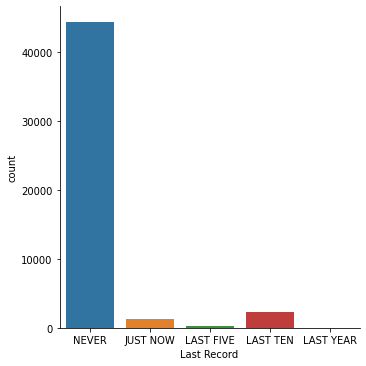

In [22]:
def mapMonthsSinceValues(x):
    if (x == 0): return 'JUST NOW'
    elif (x > 0 and x < 12): return 'LAST YEAR'
    elif (x >= 12 and x < 60): return 'LAST FIVE'
    elif (x >= 60): return 'LAST TEN'
    else: return 'NEVER'

def inputMissingsMonthsSince(df, column, new_column):
    df[new_column] = df[column].map(mapMonthsSinceValues)
    
# Imputació dels valors en una nova variable categòrica
inputMissingsMonthsSince(df_selectedCategorical,'Months Since Last Delinquency', 'Last Delinquency')
inputMissingsMonthsSince(df_selectedCategorical,'Months Since Last Record', 'Last Record')

# Veure la distribució de les noves variables
sns.catplot(x='Last Delinquency', data=df_selectedCategorical, kind='count')
sns.catplot(x='Last Record', data=df_selectedCategorical, kind='count')
plt.show()

També es poden observar les proporcions d'aquestes noves variables i realitzar la prova chi-squared.

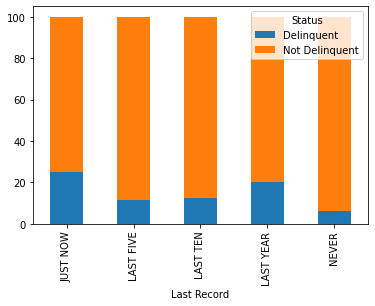

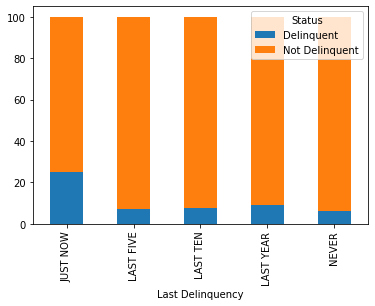

In [23]:
# Gràfic de proporcions segons la categoria
stackedBarPlot(df_selectedCategorical, 'Last Record', 'Status')
stackedBarPlot(df_selectedCategorical, 'Last Delinquency', 'Status')

In [24]:
# Chi-squared test
print(find_p_value(df_selectedCategorical, 'Last Record', 'Status'))
print(find_p_value(df_selectedCategorical, 'Last Delinquency', 'Status'))

{'stat': 820.9217272731001, 'p-value': 2.2565263992124012e-176, 'column': 'Last Record'}
{'stat': 479.58627733876153, 'p-value': 1.7410337310816523e-102, 'column': 'Last Delinquency'}


Efectivament s'observa que les dues variables tenen relació amb l'estat del crèdit i que existeix una relació d'ordre en la proporció de frau. Sembla que a **més temps** de l'última infracció, menys es tendeix a classificar el crèdit com a fraudulent.

#### Variables ordinals
Tot seguit s'analitzen les variables de tipus ordinal, que són aquelles que es poden interpretar com categòriques amb categories numèriques, i que tenen una relació d'ordre.

L'objectiu d'aquest apartat és poder assegurar quines variables de tipus ordinal influeixen en l'etiqueta del préstec de forma lineal.

Per visualitzar aquesta informació, es pot utilitzar el mateix gràfic de categories apilades que s'ha fet servir anteriorment.

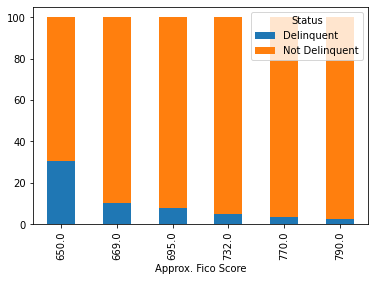

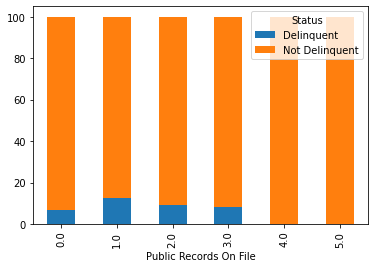

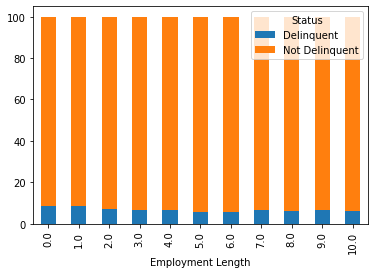

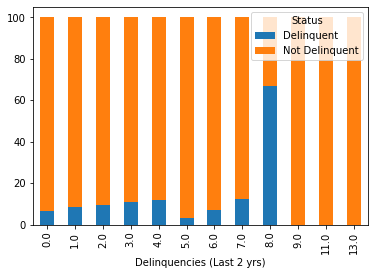

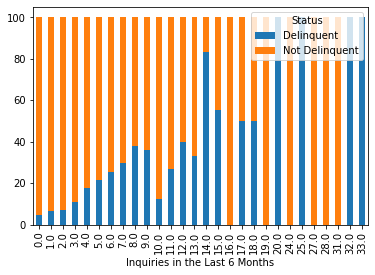

In [25]:
ordinal = ['Approx. Fico Score','Public Records On File','Employment Length','Delinquencies (Last 2 yrs)','Inquiries in the Last 6 Months']

for var in ordinal:
    stackedBarPlot(df_selectedCategorical, var, 'Status')
    
plt.show()

In [26]:
# També acompanyat del test chi-squared.
for var in ordinal:
    print(find_p_value(df_selectedCategorical, var, 'Status'))

{'stat': 827.252472713227, 'p-value': 1.4697988256454803e-176, 'column': 'Approx. Fico Score'}
{'stat': 134.59194258002924, 'p-value': 2.521867075962844e-27, 'column': 'Public Records On File'}
{'stat': 62.28182921880612, 'p-value': 1.3375717974134529e-09, 'column': 'Employment Length'}
{'stat': 53.165058580299686, 'p-value': 1.6753618066379046e-07, 'column': 'Delinquencies (Last 2 yrs)'}
{'stat': 1446.3503842921966, 'p-value': 2.7795627572500547e-288, 'column': 'Inquiries in the Last 6 Months'}


Es conclou que la correlació més forta existeix en la variable de les consultes de crèdit (inquiries), que presenta una clara relació amb la variable de l'etiqueta del frau.

La puntuació de Fico la segueix, però se sospita que aquestes dues variables són altament dependents. Aquesta assumpció es pot comprovar amb la mateixa prova de chi squared.

In [27]:
find_p_value(df_selectedCategorical, 'Approx. Fico Score','Inquiries in the Last 6 Months')

{'stat': 2836.3995080745863, 'p-value': 0.0, 'column': 'Approx. Fico Score'}

Es rebutja la hipòtesi nul·la i s'accepta que són relacionades. El valor de l'estadístic intueix que les dues variables aporten la mateixa informació, en efectes pràctics.

Finalment, es pot realitzar una classificació a tall de resum del grau de relació entre les variables categòriques/ordinals i l'estat del préstec. Es prenen només aquelles variables que han rebutjat la hipòtesi nul·la en el test de chi-squared.

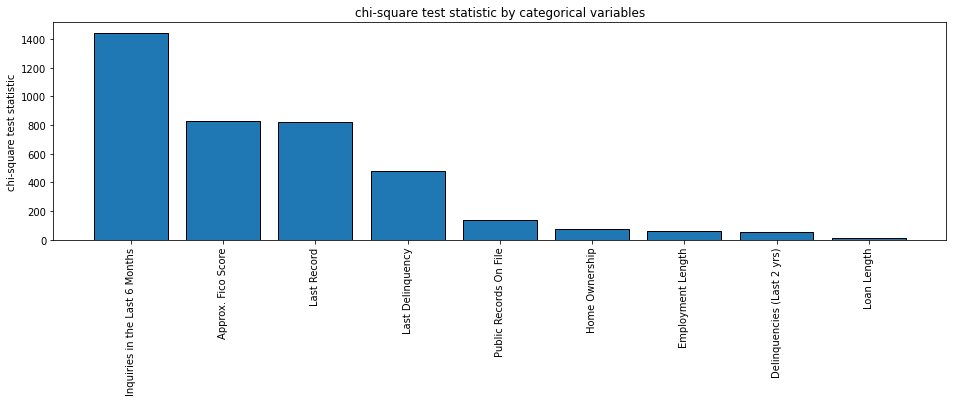

In [28]:
def find_p_values(df, columns, target_column):
    return [find_p_value(df, column, target_column) for column in columns]

columns = ['Home Ownership','Loan Length','Approx. Fico Score','Inquiries in the Last 6 Months',\
           'Delinquencies (Last 2 yrs)','Last Delinquency','Public Records On File',\
           'Last Record','Employment Length']
chi_df = pd.DataFrame(find_p_values(df_selectedCategorical, columns, 'Status'))

chi_df = chi_df.sort_values('stat',ascending=False)

plt.figure(figsize=(16,4))
plt.bar(chi_df['column'],chi_df['stat'],edgecolor='black')
plt.xticks(rotation="vertical")
plt.ylabel("chi-square test statistic")
plt.title("chi-square test statistic by categorical variables")
plt.show()

#### Resum
En aquest apartat s'ha realitzat una anàlisi estadístic bàsic enfocat principalment a la visualització sobre les relacions entre les variables i la variable objectiu, l'etiqueta del crèdit (fraudulent o no). Els resultats obtinguts són els següents:

1. Els valors perduts de les variables "Monts since Last Delinquency|Record" eren en realitat indicadors. Representen quan el client no ha comès cap infracció o obert cap registre. Es decideix categoritzar la variable en una de nova per poder mantenir tota la informació, encara que no sigui numèrica. De moment la imputació s'ha realitzat de forma visual, separant els grups d'interès. Potser es decideix utilitzar un altre mètode d'imputació en apartats posteriors.
2. Existeixen relacions molt fortes entre les variables categòriques/ordinals i la variable d'interès. En ordre d'importància:
  1. Inquiries in the last 6 Months.
  2. Fico Score.
  3. Last Record (nova variable).
  4. Last Delinquency (nova variable).
3. Altres variables que superen la prova de dependència, però no són tan fortes com les anteriors són:
  1. Public records on file.
  2. Home Ownership.
  3. Employmentn Length.
  4. Delinquencies (Last 2 yrs.)
  5. Loan Length
4. També s'ha observat si la distribució de les variables numèriques varia significativament segons la categoria del préstec. Aquelles variables que clarament presenten diferències són:
  1. Monthly Income.
  2. Total Credit Lines.
  3. Revolving Line Utilization.
5. Les altres variables numèriques que no presenten diferències en les distribucions o no són trivials a simple vista són:
  1. Monthly Payment.
  2. Open Credit Lines.
  3. Revolving Credit Balance.
  4. Debt to income ratio.

## 3. Neteja de dades


### 3.1 Elements buits




#### Els 29 valors buits
Si s'analitza l'estructura dels valors buits del dataset, es pot observar que algunes variables tenen exactament el mateix nombre de valors buits (29).

Mitjançant la inspecció d'una taula, es pot veure com les variables comparteixen els mateixos elements per als valors buits. És a dir, totes les 29 files no tenen cap valor imputat per a variables com Open credit lines, revolving credit balance...

In [29]:
# Inspeccionar les 29 files amb valors faltants per una de les variables que té 48570 elements
df_selectedCategorical[df_selectedCategorical['Open CREDIT Lines'].isna()].head(29)

,Total Amount Funded,Loan Length,Monthly PAYMENT,Debt-To-Income Ratio,Home Ownership,Monthly Income,Approx. Fico Score,Open CREDIT Lines,Total CREDIT Lines,Revolving CREDIT Balance,...,Delinquencies (Last 2 yrs),Months Since Last Delinquency,Public Records On File,Months Since Last Record,Employment Length,Status,Months Since Last Delinquency NoNA,Months Since Last Record NoNA,Last Delinquency,Last Record
106,1000,36 months,30.94,1.10,RENT,4166.67,770.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6.0,Not Delinquent,999.0,999.0,NEVER,NEVER
192,1000,36 months,32.11,10.00,RENT,1000.00,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Not Delinquent,999.0,999.0,NEVER,NEVER
352,1000,36 months,34.21,16.27,RENT,2083.33,650.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,10.0,Not Delinquent,999.0,999.0,NEVER,NEVER
504,1200,36 months,38.17,3.27,RENT,3000.00,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Not Delinquent,999.0,999.0,NEVER,NEVER
663,1275,36 months,42.65,10.00,RENT,3333.33,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,Delinquent,999.0,999.0,NEVER,NEVER
752,1400,36 months,45.78,8.61,RENT,3333.33,669.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Not Delinquent,999.0,999.0,NEVER,NEVER
1545,1900,36 months,61.00,10.00,MORTGAGE,8333.33,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,Not Delinquent,999.0,999.0,NEVER,NEVER
1798,2000,36 months,64.50,10.00,RENT,500.00,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Not Delinquent,999.0,999.0,NEVER,NEVER
2733,2500,36 months,77.69,10.36,MORTGAGE,5552.00,790.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.0,Not Delinquent,999.0,999.0,NEVER,NEVER
2969,2525,36 months,80.69,10.00,RENT,9166.67,695.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,Not Delinquent,999.0,999.0,NEVER,NEVER


Efectivament totes comparteixen els mateixos índexs. Es pot interpretar com que aquestes files no tenen la informació completa. Per tant, resulta indicat eliminar-les, ja que és un nombre molt baix i no és necessari inferir els valors perduts en funció d'altres columnes, ja que falta molta informació.

In [33]:
# Netejar les files que tenen masses valors buits
df_noWrongRows = df_selectedCategorical[df_selectedCategorical['Open CREDIT Lines'].notna()]

#### Fico score i revolving line utilization
Existeixen algunes files buides per a la puntuació Fico. El seu nombre és extremadament petit però (17 files). Per tant, es decideix prescindir d'aquestes files ja que no aporten gaire significació envers a les 40000 restants per a l'anàlisi estadístic.

El mateix es pot aplicar a revolving line utilization, que consta d'uns ~70 missings.

In [34]:
df_removedFicoRevolving = df_noWrongRows[df_noWrongRows['Approx. Fico Score'].notna() & \
                                         df_noWrongRows['Revolving Line Utilization'].notna()]

print(df_removedFicoRevolving['Approx. Fico Score'].isna().value_counts())
print(df_removedFicoRevolving['Revolving Line Utilization'].isna().value_counts())

False    48099
Name: Approx. Fico Score, dtype: int64
False    48099
Name: Revolving Line Utilization, dtype: int64


#### Employment length
Existeixen unes 2000 files de la variable Employment Length (anys que el client porta treballant) que són perdudes. Es desconeix si el motiu és o no intencionat.

Es sospita que el significat dels valors perduts pot ser el següent:

* Que sigui una dada perduda pot codificar un cas especial. Per exemple que el client no té feina.
* Poden ser dades errònies que no han estat imputades.

Es desconeix quina de les dues pot ser la correcta, així que s'ha de recórrer a eines d'anàlisi per poder continuar. En concret, es pot optar per projectar els diagrames de caixa d'una variable numèrica en funció de les categories dels anys que porta el client treballant.

A partir de la visualització es podrà extreure una interpretació.

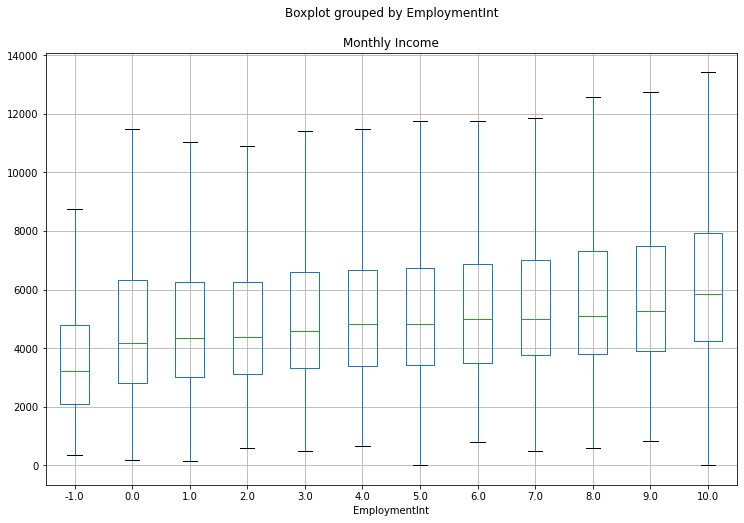

In [84]:
# Codificar els nuls del dataset per Employment Length com a -1
df_removedFicoRevolving['EmploymentInt'] = df_removedFicoRevolving['Employment Length']
df_removedFicoRevolving['EmploymentInt'] = df_removedFicoRevolving['EmploymentInt'].fillna(-1)
# Mostra el diagrama de caixa per a cada categoria de employment length
df_removedFicoRevolving.boxplot('Monthly Income','EmploymentInt',showfliers=False, figsize=(12,8))
plt.show()

Efectivament, la distribució dels valors quan la durada de la feina és NULL indica que el salari mitjà és inferior (la interpretació és clara de forma visual sense recórrer a tècniques de contrast).

Per tant, es pot donar per cert que els valors NULS codifiquen que el client no té feina (i per tant té uns ingressos inferiors a altres clients que sí que tenen feina). La font d'ingressos del client en aquest cas és desconeguda, però no és rellevant per a aquesta tasca d'anàlisi. Sols resulta interessant conèixer la distribució per intentar classificar la dada d'una forma o una altra.

Per tant, es decideix categoritzar la variable en una de nova que incorpori la semàntica d'aquesta nova classe descoberta. Les categories d'aquesta classe seràn les següents:

* PRES_NOT_EMPLOYED: Presumptive not employed. El client mostra la característica d'una mitjana de salari inferior als empleats de 0 o més anys.
* 0_TO_2_YRS: Porta treballant de 0 a 2 anys.
* 3_TO_6_YRS: Porta treballant de 3 a 6 anys.
* 7_TO_10_YRS: Porta treballant de 7 a 10 anys.

In [87]:
def mapEmployment(x):
    if (x == -1):
        return 'PRES_NOT_EMPLOYED'
    elif (x >= 0 and x <= 2):
        return '0_TO_2_YRS'
    elif (x >= 3 and x <= 6):
        return '3_TO_6_YRS'
    elif (x >= 7 and x <= 10):
        return '7_TO_10_YRS'

df_removedFicoRevolving['EmployedCat'] = df_removedFicoRevolving['EmploymentInt'].map(mapEmployment)

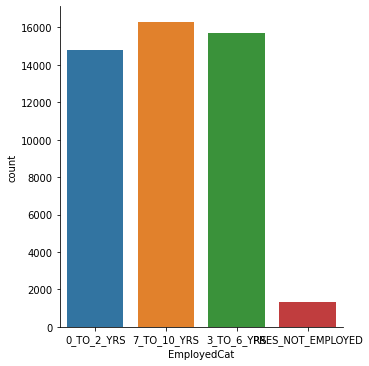

In [96]:
# Visualitzar les noves categories
sns.catplot(x='EmployedCat', data=df_removedFicoRevolving, kind='count')
plt.show()

#### Categorització i imputció de "Months since
Com ja s'ha comentat en la fase d'anàlisi, les variables de "Monts since..." que eren nul·les significaven que el client no havia comès l'acció que la variable explicava.

La forma d'imputar aquests missings es tracta de categoritzar la variable per a una de nova que separi per les categories desitjades.

Es decideix conservar les categories ja ideades anteriorment per aquest dataset, pel que no es considera aplicar cap altra transformació.

Aquesta decisió afecta les variables Months since last record i Month since last delinquency.

Finalment, s'eliminen aquelles variables del dataset que ja no s'utilitzaran.

In [101]:
# Consservar nomes les variables transformades i d'interés fins la moment
cols_preserve = ['Total Amount Funded','Monthly PAYMENT',\
              'Home Ownership','Monthly Income','Approx. Fico Score','Total CREDIT Lines',\
              'Revolving CREDIT Balance','Revolving Line Utilization',\
              'Inquiries in the Last 6 Months','Delinquencies (Last 2 yrs)','Public Records On File',\
              'Last Delinquency','Last Record','EmployedCat','Status']
df_nomissings = df_removedFicoRevolving[cols_preserve]
print(df_nomissings.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48099 entries, 0 to 48598
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Total Amount Funded             48099 non-null  int64  
 1   Monthly PAYMENT                 48099 non-null  float64
 2   Home Ownership                  48099 non-null  object 
 3   Monthly Income                  48099 non-null  float64
 4   Approx. Fico Score              48099 non-null  float64
 5   Total CREDIT Lines              48099 non-null  float64
 6   Revolving CREDIT Balance        48099 non-null  float64
 7   Revolving Line Utilization      48099 non-null  float64
 8   Inquiries in the Last 6 Months  48099 non-null  float64
 9   Delinquencies (Last 2 yrs)      48099 non-null  float64
 10  Public Records On File          48099 non-null  float64
 11  Last Delinquency                48099 non-null  object 
 12  Last Record                     

### 3.2 Identificació i tractament dels valors extrems
En aquesta secció d'identifiquen i es tracten les ocurrències de valors extrems o outliers. Aquests valors sols apareixen en les variables numèriques i poden comportar bias en les anàlisis estadístiques si no es tracten d'alguna manera.

Aquelles variables que són ordinals (categòriques encara que prenguin valors numèriques), no necessiten aquest tractament.

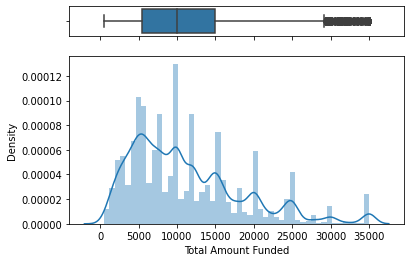

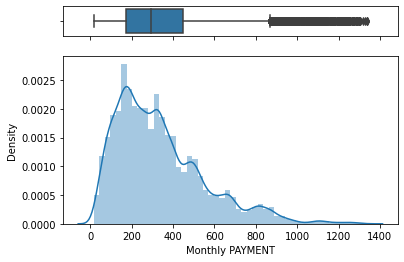

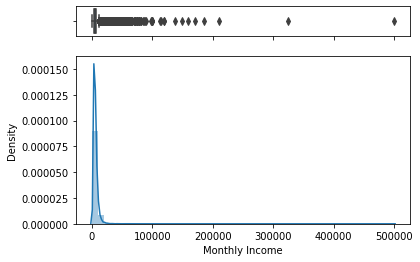

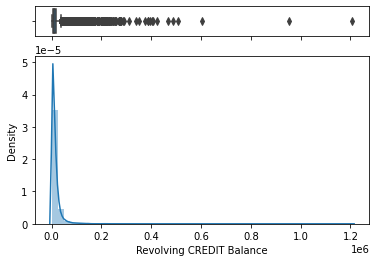

In [108]:
def plot_hist(df, column):
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})

    # Add a graph in each part
    sns.boxplot(df[column], ax=ax_box)
    sns.distplot(df[column], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

# Es comença per la quantitat del crédit, el pagament mensual i el salari del client
plot_hist(df_nomissings, 'Total Amount Funded')
plot_hist(df_nomissings, 'Monthly PAYMENT')

plot_hist(df_nomissings, 'Monthly Income')
plot_hist(df_nomissings, 'Revolving CREDIT Balance')

Com es pot observar les distribucions del volum del préstec i el pagament mensual són desplaçades a l'esquerra, provocant que no siguin ben bé normals. Existeixen valors atípics que són els que cab esperar, ja que les variables es distribueixen en funció de la riquesa de la població.

El casos més exagerats són els ingressos mensuals i el balanç de crédit, ja que apareixen molts valors atípics. Aquests valors atípics són representats per la població més rica, que esgarren completament la visualització en el seu favor.

En els tres casos el tractament és el mateix i consisteix a eliminar completament tot punt que representi un outlier. No són dades errònies sinó fruit de la distribució de la riquesa. Poden suposar un bias molt gran de cara a les anàlisis, pel que la seva eliminació és justificada.

Es continua amb 

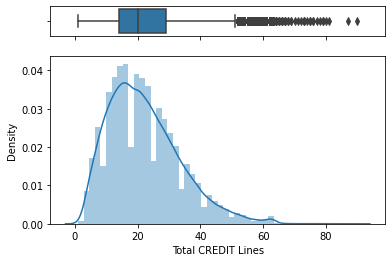

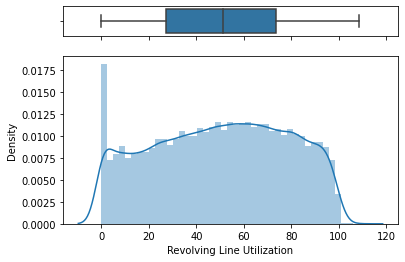

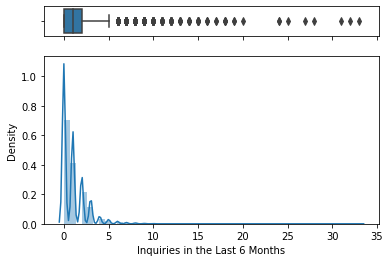

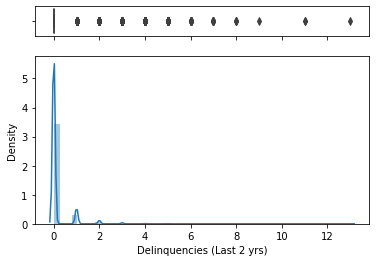

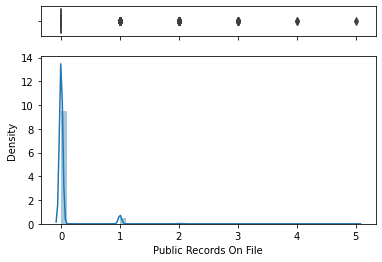

In [113]:
# Altres variables
plot_hist(df_nomissings, 'Total CREDIT Lines')
plot_hist(df_nomissings, 'Revolving Line Utilization')
plot_hist(df_nomissings, 'Inquiries in the Last 6 Months')
plot_hist(df_nomissings, 'Delinquencies (Last 2 yrs)')
plot_hist(df_nomissings, 'Public Records On File')

Les conclusions per aquestes variables són:

1. Les línies de crèdit totals de l'individu segueixen la mateixa distribució que les variables de quantitats. Els outliers s'eliminaran.
2. La utilització del crèdit (expressat en %), no segueix cap distribució específica ni presenta outliers. Es conserva tal com està.
3. Els outliers de consultes en els últims 6 mesos es poden eliminar, ja que es tracten de casos individuals. Aquests poden o no ser etiquetats com a fraudulents i per tant poden suposar un bias molt alt en les dades. S'han d'eliminar del dataset per tal de garantir que, a major nombre de consultes, major probabilitat de classificar el préstec com a fraudulent.
4. Les variables delinquencies in last 2 years i la de public records on file es poden ignorar, ja que pràcticament tots els valors més grans que 0 són outliers.

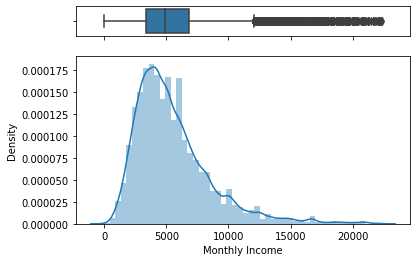

In [120]:
# Eliminar els outliers
def remove_outliers(df, column):
    return df[np.abs(df[column]-df[column].mean())<=(3*df[column].std())]

x = remove_outliers(df_nomissings, 'Monthly Income')
plot_hist(x, 'Monthly Income')

### `Loan Length`

És una variable categòrica amb 2 valors, fem taula de freqüències i gràfic



In [ ]:
print("Distribució de freqüències:\n", pd.value_counts(df['Loan Length']))
print("\n")
print("Distribució de freqüències relatives:\n", 100 * df['Loan Length'].value_counts() / len(df['Loan Length']))

# Gráfic de barres
plot = df['Loan Length'].value_counts().plot(kind='bar', title='Durada del prèstec')


### `Home Ownership`

És una variable categòrica amb 5 valors, fem taula de freqüències i gràfic.



In [ ]:
print("Distribució de freqüències: \n", pd.value_counts(df['Home Ownership']))
print("\n")
print("Distribució de freqüències relatives: \n", 100 * df['Home Ownership'].value_counts() / len(df['Home Ownership']))

# Gráfic de barres
plot = df['Home Ownership'].value_counts().plot(kind='bar', title='Propietat de la vivenda')

### `Status`

És una variable categòrica amb 3 valors, aquesta variable és la que volem predir. Fem taula de freqüències i gràfic



In [ ]:
print("Distribució de freqüències:\n", pd.value_counts(df['Status']))
print("\n")
print("Distribució de freqüències relatives:\n", 100 * df['Status'].value_counts() / len(df['Status']))

# Gráfic de barres
plot = df['Status'].value_counts().plot(kind='bar', title='Estat del client morós o no morós')

<div style="background-color: #fcf2f2; border-color: #dfb5b4; border-left: 5px solid #dfb5b4; padding: 0.5em;">
<strong>De les tres variables categòriques concloem que de moment no en descartem cap, encara que la durada d'un préstec pensem que podríem elimnar-la ja que el 75% dels préstecs són a 36 mesos. Pel que fa a la variable "Home Ownership" eliminem els registres que tenen valors: Any i None i pel que fa la variable Status, ens quedem només amb els resgitres de morós i no morós. Els que tenen el valor "Període de gràcia", només són un 0,78% i aquests acabarant sent morosós o no morosos, per tant no ens interessen analitzar.</strong>
</div>

In [ ]:
# Procedim a eliminar els registres que tenen valor = Any i None a la variable 'Home Ownership'
# Procedim a eliminar els registres que tenen valor = In Grace Period  a la variable 'Status'
df = df[df['Home Ownership'] != 'ANY']
df = df[df['Home Ownership'] != 'NONE']
df = df[df['Status'] != 'In Grace Period']
plot = df['Home Ownership'].value_counts().plot(kind='bar', title='Propietat de la vivenda')
plot = df['Status'].value_counts().plot(kind='bar', title='Estat del client morós o no morós')


### `Varibles númeriques`

Analitzem ara les variables numèriques i fem un histograma per cada una



In [ ]:
#Dibuixem els histogrames per les variables numèriques i calculem els estadístics
#df.hist()
#plt.show()

plt.title ('Total Amount Funded')
plt.hist(df['Total Amount Funded'], bins=50)
plt.show()

plt.title ('Monthly PAYMENT')
plt.hist(df['Monthly PAYMENT'], bins=50)
plt.show()

plt.title ('Debt-To-Income Ratio')
plt.hist(df['Debt-To-Income Ratio'], bins=50)
plt.show()

plt.title ('Monthly Income')
plt.hist(df['Monthly Income'], bins=50)
plt.show()

plt.title ('Approx. Fico Score')
plt.hist(df['Approx. Fico Score'], bins=50)
plt.show()

plt.title ('Open CREDIT Lines')
plt.hist(df['Open CREDIT Lines'], bins=50)
plt.show()

plt.title ('Total CREDIT Lines')
plt.hist(df['Total CREDIT Lines'], bins=50)
plt.show()

plt.title ('Revolving CREDIT Balance')
plt.hist(df['Revolving CREDIT Balance'], bins=50)
plt.show()

plt.title ('Revolving Line Utilization')
plt.hist(df['Revolving Line Utilization'], bins=50)
plt.show()

plt.title ('Inquiries in the Last 6 Months')
plt.hist(df['Inquiries in the Last 6 Months'], bins=50)
plt.show()

plt.title ('Accounts Now Delinquent')
plt.hist(df['Accounts Now Delinquent'], bins=50)
plt.show()

plt.title ('Delinquencies (Last 2 yrs)')
plt.hist(df['Delinquencies (Last 2 yrs)'], bins=50)
plt.show()

plt.title ('Months Since Last Delinquency')
plt.hist(df['Months Since Last Delinquency'], bins=50)
plt.show()

plt.title ('Public Records On File')
plt.hist(df['Public Records On File'], bins=50)
plt.show()

plt.title ('Months Since Last Record')
plt.hist(df['Months Since Last Record'], bins=50)
plt.show()

plt.title ('Employment Length')
plt.hist(df['Employment Length'], bins=50)
plt.show()

df.describe()

## 3. Neteja de les dades: Identificació i tractament dels zeros i elements buids, així com dels valors extrems.



### `Identifiquem i tractem els valors zeros i elements buids`

In [ ]:
#Mirem quines variables tenen valors no disponibles i en quin percetatge
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data[missing_data['Total'] > 0]

#Conclusions:

#- Les variables "Total Amount Funded", "Monthly PAYMENT", "Debt-To-Income Ratio" i "Monthly Income" no tenen valors buids.

#- La variable "Months Since Last Record" té un 92% de registres buids per tant decidim eliminar aquesta columna del nostre dataset
#- Decidim eliminar les columnes que tenen més d'un 5% de valors no informats. Per tant eliminem "Months Since Last Record" i "Months Since Last Delinquency"
#- Veiem que hi ha 8 variables que tenen 25 registres buids. Mirem si es tracta dels mateixos registres perque llavors procedim a eliminar aquests registres. 




In [ ]:
#Selecció de les columnes amb més d'un 5% de valors no informats
delete_columns = df.columns[df.isnull().sum()/len(df)*100 > 5]
delete_columns


In [ ]:
#Esborrem les dos columnes del nostre dataset
df = df.drop(delete_columns, axis=1)

In [ ]:
#Mostrem la informació del dataset un cop eliminades les 2 columnes
print("Informació del dataset: \n", df.info())

In [ ]:
#Mostrem els 25 registres que tenen la variable "Revolving CREDIT Balance" buida
print(df[df['Total CREDIT Lines'].isnull()])

In [ ]:
#Hem vist que es tracta dels mateixos 25 registres procedim a eliminar-los
df = df[df['Total CREDIT Lines'].notnull()]

#Mirem si s'ha fet ok
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print(missing_data[missing_data['Total'] > 0])
print("\n")

#Mostrem la informació del dataset un cop eliminats els 25 registres
print("Informació del dataset: \n", df.info())

In [ ]:
#Amb aquestes tres variables com que no són molts els registres no ens compliquem i utilizem el mètode d'imputar la mitjana.
df['Employment Length'] = df['Employment Length'].fillna(df['Employment Length'].mean())
df['Revolving Line Utilization'] = df['Revolving Line Utilization'].fillna(df['Revolving Line Utilization'].mean())
df['Approx. Fico Score'] = df['Approx. Fico Score'].fillna(df['Approx. Fico Score'].mean())

In [ ]:
#Hem vist que les variables 'Total Amount Funded' ,'Approx. Fico Score' ,'Open CREDIT Lines' ,'Total CREDIT Lines' ,'Revolving CREDIT Balance' ,'Inquiries in the Last 6 Months' ,'Accounts Now Delinquent' ,'Delinquencies (Last 2 yrs)' ,'Months Since Last Delinquency' ,'Public Records On File' ,'Months Since Last Record' ,'Employment Length" són numeros sencers, per tant les convetim ara que ja no tenim valors buids

######### JOAN: NO em surt convertir a sencers !!!!!

#df['Approx. Fico Score'].astype('int32')
#df['Open CREDIT Lines'].astype('int32')

print("Informació del dataset: \n", df.info())

### `Tractem els valors extrems`

In [ ]:
plt.boxplot(df['Employment Length'])
plt.boxplot(df['Monthly PAYMENT'])
